Importing the dependencies

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics

In [70]:
#Fetch the dataset
housing = sklearn.datasets.fetch_california_housing()

In [71]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [72]:

#Create a DataFrame
house_price_dataframe = pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [73]:
#Add target variable to DataFrame
house_price_dataframe['target'] = housing.target

In [74]:
house_price_dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [75]:
house_price_dataframe.shape

(20640, 9)

NOTE: We don't have the price column here because until now we have just imported the target array and we have to yet import the target array

In [76]:
# Add the target (price) column to the DataFrame
house_price_dataframe['price'] = housing.target

In [77]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [78]:
#Check for number of rows and coloumns in the dataframe
house_price_dataframe.shape

(20640, 10)

In [79]:
#Check for the null values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
price         0
dtype: int64

In [80]:
#get the statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,5.000010


In [81]:
correlation = house_price_dataframe.corr()

<Axes: >

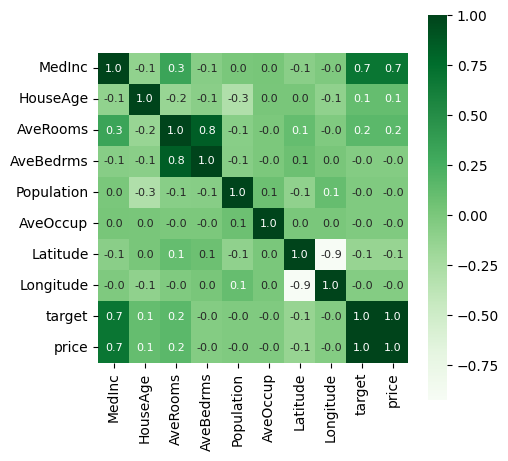

In [82]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [83]:
X = house_price_dataframe.drop(['price'], axis=1)
y = house_price_dataframe['price']

In [84]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 2)

In [85]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 9) (16512, 9) (4128, 9)


In [86]:
model_1 = XGBRegressor()


In [87]:
model_1.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

NOTE: for previous models we used accuracy score for the evaluation, for regression we will not use that rather we will be using r squared method, absolute mean error, square mean error, etc.

Prediction on training data

In [88]:
# accuracy for prediction on training data
training_data_prediction = model_1.predict(X_train)

In [89]:
training_data_prediction

array([0.7217324, 2.7355433, 0.5786305, ..., 1.9222438, 1.5352833,
       0.8096097], dtype=float32)

In [90]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999843708817635
Mean Absolute Error :  0.0032788743486385345


In [91]:
# accuracy for prediction on test data
test_data_prediction = model_1.predict(X_test)

In [92]:
# R squared error
score_3 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_4 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error : ", score_3)
print('Mean Absolute Error : ', score_4)

R squared error :  0.999929603126291
Mean Absolute Error :  0.0051191317554730815


Now lets see results for Linear Regression

In [93]:
model_2 = LinearRegression()

In [94]:
model_2.fit(X_train, y_train)

LinearRegression()

In [98]:
# accuracy for prediction on training data
training_data_prediction_2 = model_2.predict(X_train)

# R squared error
score_2_1 = metrics.r2_score(y_train, training_data_prediction_2)

# Mean Absolute Error
score_2_2 = metrics.mean_absolute_error(y_train, training_data_prediction_2)

print("R squared error : ", score_2_1)
print('Mean Absolute Error : ', score_2_2)

R squared error :  1.0
Mean Absolute Error :  5.835659696913921e-14


In [99]:
# accuracy for prediction on test data
test_data_prediction_2 = model_2.predict(X_test)

In [101]:
# R squared error
score_2_3 = metrics.r2_score(y_test, test_data_prediction_2)

# Mean Absolute Error
score_2_4 = metrics.mean_absolute_error(y_test, test_data_prediction_2)

print("R squared error : ", score_2_3)
print('Mean Absolute Error : ', score_2_4)

R squared error :  1.0
Mean Absolute Error :  5.532224118947083e-14
